# Covid Data: Preprocessing & Descriptive analytics

- **1 - Yes / 2 - No**
- **sex:** 1 for female and 2 for male.
- **age:** of the patient.
- **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type:** type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **usmr:** Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit:** type of institution of the National Health System that provided the care.
- **icu:** Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died:** If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [28]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import pandas as pd

# Loading the Covid Data as df
df = pd.read_csv('Covid Data.csv')

In [29]:
# Removing columns
removed_columns = ['MEDICAL_UNIT', 'SEX', 'PREGNANT', 'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE']
df = df.drop(columns=removed_columns)


In [30]:
df.head(5)

,USMER,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,ASTHMA,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,03/05/2020,97,1,65,2,2,2,2,2,3,97
1,2,1,03/06/2020,97,1,72,2,2,1,1,2,5,97
2,2,2,09/06/2020,1,2,55,2,2,2,2,2,3,2
3,2,1,12/06/2020,97,2,53,2,2,2,2,2,7,97
4,2,1,21/06/2020,97,2,68,2,2,2,2,2,3,97


In [31]:
df.tail(5)

,USMER,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,ASTHMA,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,1,9999-99-99,97,2,40,2,2,2,2,2,7,97
1048571,1,2,9999-99-99,2,2,51,2,2,2,2,2,7,2
1048572,2,1,9999-99-99,97,2,55,2,2,2,2,2,7,97
1048573,2,1,9999-99-99,97,2,28,2,2,2,2,2,7,97
1048574,2,1,9999-99-99,97,2,52,2,2,2,2,2,7,97


<Axes: xlabel='AGE', ylabel='Count'>

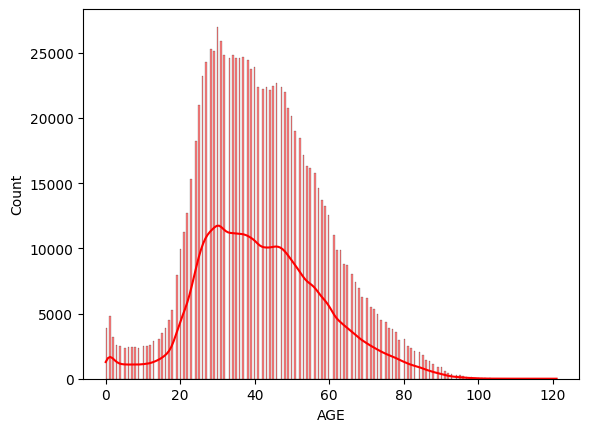

In [32]:
sns.histplot(data=df, x=df["AGE"], kde=True, color="red")

In [33]:
df.PNEUMONIA.value_counts() 

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

<Axes: xlabel='PNEUMONIA'>

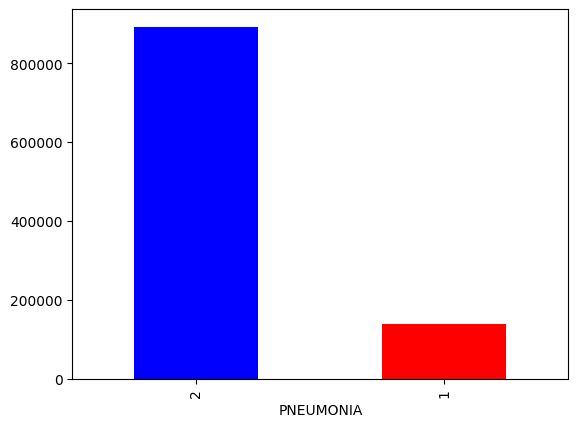

In [37]:
df = df[df['PNEUMONIA'].isin([1, 2])]

df.PNEUMONIA.value_counts().plot(kind="bar", color=['blue', 'red'])

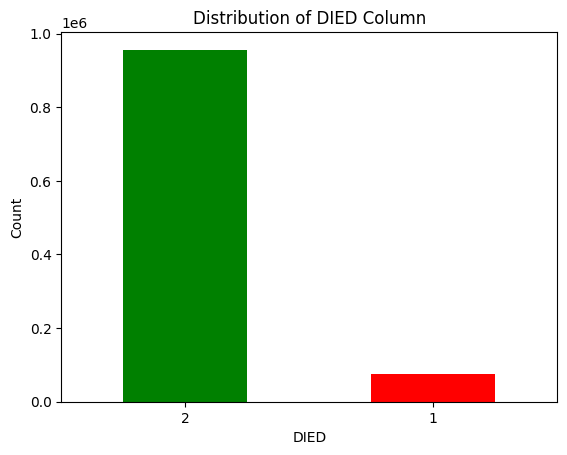

In [39]:
df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 2, 1)

df['DIED'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of DIED Column')
plt.xlabel('DIED')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

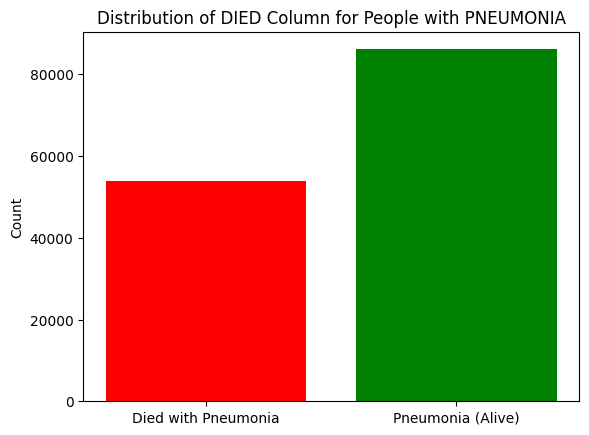

In [42]:
import matplotlib.pyplot as plt

df_dead_pneumonia = df[(df['DIED'] == 1) & (df['PNEUMONIA'] == 1)]
df_pneumonia_not_dead = df[(df['DIED'] == 2) & (df['PNEUMONIA'] == 1)]

count_dead_pneumonia = len(df_dead_pneumonia)
count_pneumonia_not_dead = len(df_pneumonia_not_dead)

plt.bar(['Died with Pneumonia', 'Pneumonia (Alive)'], [count_dead_pneumonia, count_pneumonia_not_dead], color=['red', 'green'])
plt.title('Distribution of DIED Column for People with PNEUMONIA')
plt.ylabel('Count')
plt.show()


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   PATIENT_TYPE          1048575 non-null  int64 
 2   DATE_DIED             1048575 non-null  object
 3   INTUBED               1048575 non-null  int64 
 4   PNEUMONIA             1048575 non-null  int64 
 5   AGE                   1048575 non-null  int64 
 6   ASTHMA                1048575 non-null  int64 
 7   CARDIOVASCULAR        1048575 non-null  int64 
 8   OBESITY               1048575 non-null  int64 
 9   RENAL_CHRONIC         1048575 non-null  int64 
 10  TOBACCO               1048575 non-null  int64 
 11  CLASIFFICATION_FINAL  1048575 non-null  int64 
 12  ICU                   1048575 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 104.0+ MB


In [36]:
df.isna().sum()

USMER                   0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
ASTHMA                  0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

### descriptive analytics

In [52]:
threshold_age = 90
df = df[df['AGE'] <= threshold_age]

33.577882586739626
34.0
30


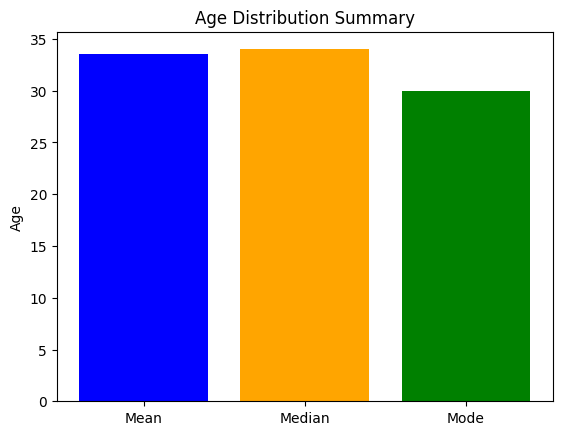

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

meanAge = df['AGE'].mean()
medianAge = df['AGE'].median()
modeAge = stats.mode(df['AGE']).mode
print(meanAge)
print(medianAge)
print(modeAge)
plt.bar(['Mean', 'Median', 'Mode'], [meanAge, medianAge, modeAge], color=['blue', 'orange', 'green'])
plt.title('Age Distribution Summary')
plt.ylabel('Age')
plt.show()


### Sve 3 analize nam daju vrednosti izmedju 30 i 34

50


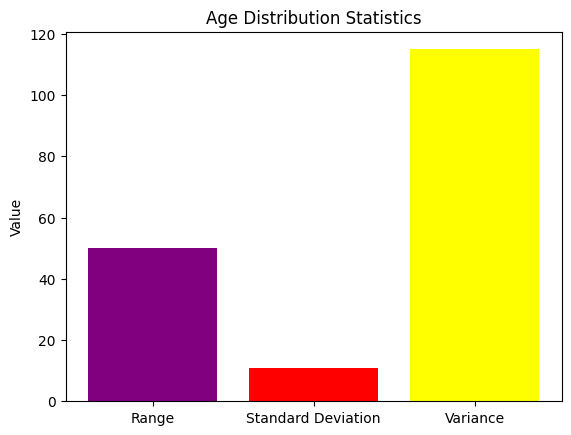

In [54]:
age_data = df['AGE']

age_range = age_data.max() - age_data.min()
std_dev_age = age_data.std()
variance_age = age_data.var()

plt.bar(['Range', 'Standard Deviation', 'Variance'], [age_range, std_dev_age, variance_age], color=['purple', 'red', 'yellow'])
plt.title('Age Distribution Statistics')
plt.ylabel('Value')
plt.show()